# Necessary packages

In [103]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV, LinearRegression
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Dataset Loadning and Preprocessing

In [2]:
df = pd.read_csv(
    "maize_data.csv",
    engine="python", 
    sep=None,         
    on_bad_lines="warn"  
)

In [3]:
df.shape

(4981, 7394)

In [4]:
df.head()

,Unnamed: 0,Geno_Code,pop,m1,m2,m3,m4,m5,m6,m7,...,m7382,m7383,m7384,m7385,m7386,m7387,m7388,m7389,Entry,DtoA
0,1,Z001E0001,1,1,1,1,1,1,1,1,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,"75,5364"
1,2,Z001E0002,1,2,2,2,2,2,2,2,...,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2,"76,9075"
2,3,Z001E0003,1,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3,"75,2646"
3,4,Z001E0004,1,0,0,0,0,0,0,0,...,2,2,2.0,2.0,2.0,2.0,2.0,2.0,4,"73,6933"
4,5,Z001E0005,1,2,2,2,2,2,2,2,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,5,"79,2441"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Columns: 7394 entries, Unnamed: 0 to DtoA
dtypes: float64(40), int64(3), object(7351)
memory usage: 281.0+ MB


In [6]:
df.describe()

,Unnamed: 0,pop,m1860,m2677,m3435,m3436,m3437,m4221,m4222,m4780,...,m6831,m6832,m6833,m7384,m7385,m7386,m7387,m7388,m7389,Entry
count,4981.000000,4981.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,...,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4981.000000
mean,2491.000000,12.963260,0.951268,0.985981,0.972185,0.972185,1.034268,0.961727,0.961727,0.980196,...,0.970405,0.970405,0.970405,0.995550,0.995550,0.995550,0.995550,0.995550,0.995550,100.393696
std,1438.035176,7.199848,0.963885,0.960854,0.958698,0.958698,0.964392,0.960541,0.960541,0.955642,...,0.963046,0.963046,0.963046,0.962912,0.962912,0.962912,0.962912,0.962912,0.962912,57.714063
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1246.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000
50%,2491.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000
75%,3736.000000,19.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,150.000000
max,4981.000000,25.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,200.000000


In [7]:
df.count()

Unnamed: 0    4981
Geno_Code     4981
pop           4981
m1            4494
m2            4494
              ... 
m7387         4494
m7388         4494
m7389         4494
Entry         4981
DtoA          4981
Length: 7394, dtype: int64

In [8]:
df.isna().sum().sort_values(ascending=False)

m3695         487
m4934         487
m4932         487
m4931         487
m4930         487
             ... 
Entry           0
Unnamed: 0      0
Geno_Code       0
pop             0
DtoA            0
Length: 7394, dtype: int64

In [9]:
df.isnull().sum().sort_values(ascending=False)

m3695         487
m4934         487
m4932         487
m4931         487
m4930         487
             ... 
Entry           0
Unnamed: 0      0
Geno_Code       0
pop             0
DtoA            0
Length: 7394, dtype: int64

In [10]:
df.columns = df.columns.str.strip()
y = df['DtoA']


mcols = df.filter(regex=r'^m\d+$').columns
X = df[mcols].copy()


X = X.replace({'NA': np.nan, 'N/A': np.nan, '': np.nan, ' ': np.nan})

X = X.apply(pd.to_numeric, errors='coerce')


non_num = X.select_dtypes(exclude=[np.number]).columns

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
def clean_numeric_series(s):
    s = s.astype(str).str.strip()

    mask_decimal_comma = s.str.match(r'^\d+,\d+$')
    s.loc[mask_decimal_comma] = s.loc[mask_decimal_comma].str.replace(',', '.', regex=False)

    s = s.str.replace(',', '', regex=False)
    return pd.to_numeric(s, errors='coerce')

y_train = clean_numeric_series(y_train)
y_test  = clean_numeric_series(y_test)


In [12]:
print(f"X_train shape:: {X_train.shape}, X_test shape:: {X_test.shape}, Y_train shape:: {y_train.shape}, Y_test shape:: {y_test.shape}")

X_train shape:: (3984, 7389), X_test shape:: (997, 7389), Y_train shape:: (3984,), Y_test shape:: (997,)


# Data Statistics Visualization

In [13]:
import matplotlib.pyplot as plt
from scipy import stats

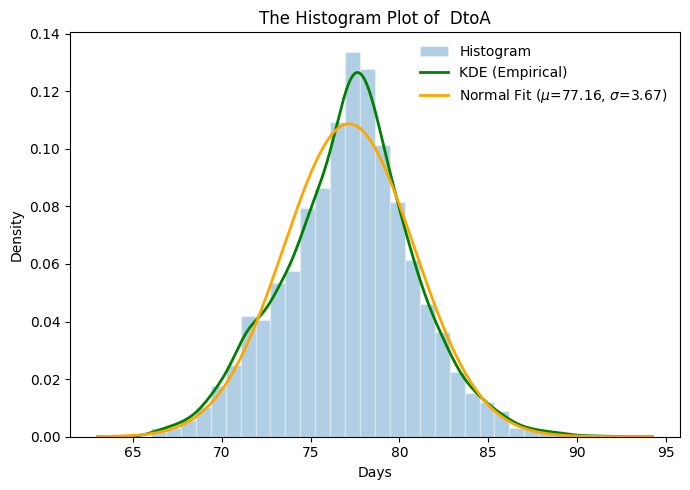

C:\Users\admin\AppData\Local\Temp\ipykernel_30496\1049668249.py:44: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(y_obs, vert=True, labels=["DtoA"], whis=1.5)


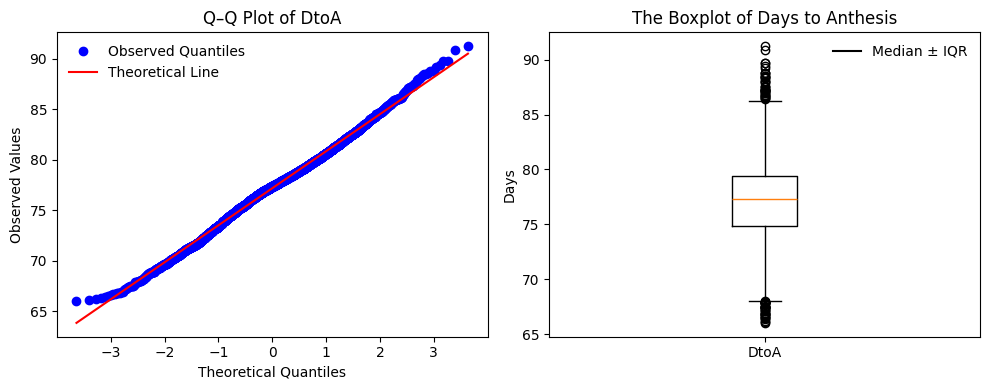

In [14]:
y_obs = clean_numeric_series(df['DtoA']).dropna().values  # numpy array

# === Fig. 1: Histogram + KDE + Normal curve ===
plt.figure(figsize=(7,5))

# Histogram
plt.hist(y_obs, bins=30, density=True, alpha=0.35, edgecolor='white', label='Histogram')

# KDE (Kernel Density Estimate)
kde = stats.gaussian_kde(y_obs)
xs = np.linspace(y_obs.min()-3, y_obs.max()+3, 400)
plt.plot(xs, kde(xs), linewidth=2, color='green', label='KDE (Empirical)')

# Normal fit curve
mu, sigma = stats.norm.fit(y_obs)
plt.plot(xs, stats.norm.pdf(xs, loc=mu, scale=sigma), linewidth=2, color='orange', label=f'Normal Fit ($\\mu$={mu:.2f}, $\\sigma$={sigma:.2f})')

plt.title("The Histogram Plot of  DtoA")
plt.xlabel("Days")
plt.ylabel("Density")
plt.legend(loc='upper right', frameon=False)
plt.tight_layout()
plt.savefig("fig1_hist_dtoa.png", dpi=300, bbox_inches="tight")
plt.show()


# === Fig. 2: Q–Q plot (left) + Boxplot (right) ===
fig = plt.figure(figsize=(10,4))

# (a) Q–Q plot
ax1 = fig.add_subplot(1,2,1)
stats.probplot(y_obs, dist="norm", plot=ax1)
ax1.set_title("Q–Q Plot of DtoA")
ax1.set_xlabel("Theoretical Quantiles")
ax1.set_ylabel("Observed Values")

# 커스텀 Legend 추가
handles = [plt.Line2D([0], [0], color='blue', marker='o', linestyle='None', label='Observed Quantiles'),
           plt.Line2D([0], [0], color='red', linestyle='-', label='Theoretical Line')]
ax1.legend(handles=handles, loc='upper left', frameon=False)

# (b) Boxplot
ax2 = fig.add_subplot(1,2,2)
ax2.boxplot(y_obs, vert=True, labels=["DtoA"], whis=1.5)
ax2.set_title("The Boxplot of Days to Anthesis")
ax2.set_ylabel("Days")
ax2.legend([plt.Line2D([0], [0], color='black', lw=1.5)], ['Median ± IQR'], loc='upper right', frameon=False)

fig.tight_layout()
fig.savefig("fig2_qq_box_dtoa.png", dpi=300, bbox_inches="tight")
plt.show()

In [15]:
stats_summary = {
    "Minimum": y_obs.min(),
    "Mean": y_obs.mean(),
    "Standard Deviation": y_obs.std(),
    "Median": np.median(y_obs),
    "Maximum": y_obs.max()
}

for k, v in stats_summary.items():
    print(f"{k}: {v:.2f}")

Minimum: 66.02
Mean: 77.16
Standard Deviation: 3.67
Median: 77.33
Maximum: 91.23


# Data Preprocessing (Scaling)

In [16]:
preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler(with_mean=True)),
])

X_train = preprocessor.fit_transform(X_train)
X_test  = preprocessor.transform(X_test)

In [17]:
valid_tr = y_train.notna()
X_train = X_train[valid_tr]
y_train = y_train[valid_tr]

valid_te = y_test.notna()
X_test = X_test[valid_te]
y_test = y_test[valid_te]

# Model training

In [18]:
import statsmodels.api as sm

## Cross validation, Model fitting, and Testing

In [19]:
def evaluate(name, model, Xtr, ytr, Xte, yte, extras=None, cv=5):
    
    row = {"Method": name}

    # === Cross-Validation ===
    t0 = time.perf_counter()
    # negative RMSE
    rmse_cv = np.sqrt(-cross_val_score(model, Xtr, ytr, scoring='neg_mean_squared_error', cv=cv))
    mae_cv  = -cross_val_score(model, Xtr, ytr, scoring='neg_mean_absolute_error', cv=cv)
    cv_time = time.perf_counter() - t0

    # === Train + Test evaluation ===
    t1 = time.perf_counter()
    model.fit(Xtr, ytr)
    pred = model.predict(Xte)
    test_time = time.perf_counter() - t1

    rmse_test = mean_squared_error(yte, pred, squared=False)
    mae_test  = mean_absolute_error(yte, pred)

    # === Record results ===
    row.update({
        "RMSE(CV)": rmse_cv.mean(),
        "MAE(CV)": mae_cv.mean(),
        "Time(CV)": round(cv_time, 3),
        "RMSE(Test)": rmse_test,
        "MAE(Test)": mae_test,
        "Time(Test)": round(test_time, 3)
    })

    if extras:
        row.update(extras)

    return row, model

## Function for AIC

In [20]:
def forward_stepwise(Xdf, y, criterion="aic", max_feats=None):
        remaining = list(Xdf.columns)
        selected = []
        current_score = np.inf
        while True:
            scores = []
            for cand in remaining:
                cols = selected + [cand]
                X_ = sm.add_constant(Xdf[cols], has_constant="add")
                model = sm.OLS(y, X_).fit()
                score = model.aic if criterion == "aic" else model.bic
                scores.append((score, cand))
            if not scores:
                break
            scores.sort()
            best_new, best_cand = scores[0]
            if best_new + 1e-9 < current_score:
                remaining.remove(best_cand)
                selected.append(best_cand)
                current_score = best_new
                if max_feats and len(selected) >= max_feats:
                    break
            else:
                break
        return selected, current_score

## RIDGE

In [21]:
results = []

ridge = RidgeCV(alphas=np.logspace(-3, 3, 12), cv=5)
row, ridge_fitted = evaluate("RidgeCV", ridge, X_train, y_train, X_test, y_test,
                             extras={"#Feats/Comps": X_train.shape[1]})
row["alpha_*"] = getattr(ridge_fitted, "alpha_", None)
results.append(row)



## LASSO

In [ ]:
lasso = LassoCV(alphas=np.logspace(-3, 3, 12), cv=5, n_jobs=-1)

row, lasso_fitted = evaluate("LassoCV", lasso, X_train, y_train, X_test, y_test)

n_nonzero = int((np.abs(lasso_fitted.coef_) > 1e-12).sum())
row.update({
    "#Feats/Comps": n_nonzero,
    "alpha_*": getattr(lasso_fitted, "alpha_", None)
})
results.append(row)

## ElasticNet

In [23]:
enet = ElasticNetCV(
    l1_ratio=[.1, .3, .5, .7, .9],
    alphas=np.logspace(-3, 3, 12),
    cv=5, n_jobs=1
)

row, enet_fitted = evaluate("ElasticNetCV", enet, X_train, y_train, X_test, y_test)

n_nonzero = int((np.abs(enet_fitted.coef_) > 1e-12).sum())
row.update({
    "#Feats/Comps": n_nonzero,
    "alpha_*": getattr(enet_fitted, "alpha_", None),
    "l1_ratio_*": getattr(enet_fitted, "l1_ratio_", None)
})
results.append(row)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.079e+00, tolerance: 3.558e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.415e+01, tolerance: 3.558e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.104e+02, toleranc

In [28]:
feat_names = df.filter(regex=r'^m\d+$').columns.tolist()

Xtr_df = pd.DataFrame(X_train, columns=feat_names, index=y_train.index)
Xte_df = pd.DataFrame(X_test,  columns=feat_names, index=y_test.index)

## AIC

In [58]:
TOP_K = 500

def safe_corr(col, yv):
    c = np.corrcoef(col, yv)[0, 1]
    return 0.0 if np.isnan(c) or np.isinf(c) else c

corrs = Xtr_df.apply(lambda col: safe_corr(col.values, y_train.values), axis=0)
top_feats = corrs.abs().sort_values(ascending=False).head(TOP_K).index.tolist()

# AIC
t0 = time.perf_counter()
sel_aic, score_aic = forward_stepwise(Xtr_df[top_feats], y_train, criterion="aic")
lr_aic = LinearRegression()
row_aic, _ = evaluate("Stepwise(Forward,AIC)", lr_aic,
                      Xtr_df[sel_aic].values, y_train,
                      Xte_df[sel_aic].values, y_test,
                      extras={"#Feats/Comps": len(sel_aic)})
row_aic["Stepwise_score"] = score_aic
row_aic["Time(s)"] = round(time.perf_counter() - t0, 3)
results.append(row_aic)


## PCR

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectKBest, f_regression

K_SELECT = 500        
PCA_KS   = [20, 50, 100]
ALPHAS   = np.logspace(-3, 3, 7)

pcr_pipe = Pipeline([
    ("select", SelectKBest(score_func=f_regression, k=K_SELECT)),
    ("pca", PCA(svd_solver='randomized', random_state=42)),
    ("ridge", Ridge())
])

param_grid_pcr = {
    "pca__n_components": PCA_KS
}

gs_pcr = GridSearchCV(
    pcr_pipe, param_grid_pcr,
    cv=5,          
    n_jobs=1,      
    refit=True
)

row_pcr, pcr_best = evaluate("PCR(TopK+GS)", gs_pcr,
                             X_train, y_train,
                             X_test,  y_test)

best_k = pcr_best.best_params_["pca__n_components"]
best_alpha = pcr_best.best_params_["ridge__alpha"]
row_pcr.update({"#Feats/Comps": best_k, "alpha_*": best_alpha, "TopK": K_SELECT})
results.append(row_pcr)


## PLS

In [43]:
K_SELECT = 500
PLS_KS   = [20, 50, 100]

max_nc = min(K_SELECT, X_train.shape[0])
PLS_KS = sorted({k for k in PLS_KS if k <= max_nc})
if not PLS_KS:
    PLS_KS = [min(10, max_nc)]  

pls_pipe = Pipeline([
    ("select", SelectKBest(score_func=f_regression, k=K_SELECT)),
    ("pls", PLSRegression(scale=False, copy=False))
])

param_grid_pls = {
    "pls__n_components": PLS_KS
}

gs_pls = GridSearchCV(
    pls_pipe, param_grid_pls,
    cv=5,        
    n_jobs=1, 
    refit=True
)

row_pls, pls_best = evaluate(
    "PLS(TopK+GS)", gs_pls,
    X_train.astype("float32"), y_train,
    X_test.astype("float32"),  y_test
)

row_pls.update({
    "#Feats/Comps": pls_best.best_params_["pls__n_components"],
    "TopK": K_SELECT
})
results.append(row_pls)

# Results

In [196]:
len(results)

6

In [180]:
results[0]

{'Method': 'RidgeCV',
 'RMSE(CV)': 3.7119583366437325,
 'MAE(CV)': 2.8985062505781105,
 'Time(CV)': 650.559,
 'RMSE(Test)': 3.7165071326232555,
 'MAE(Test)': 2.8945595245811653,
 'Time(Test)': 86.341,
 '#Feats/Comps': 7389,
 'alpha_*': 1000.0}

In [181]:
results[1]

{'Method': 'LassoCV',
 'RMSE(CV)': 3.594024870825053,
 'MAE(CV)': 2.781728655038299,
 'Time(CV)': 1773.916,
 'RMSE(Test)': 3.5685902666662246,
 'MAE(Test)': 2.7605793069329145,
 'Time(Test)': 235.727,
 '#Feats/Comps': 135,
 'alpha_*': 0.04328761281083057}

In [182]:
results[2]

{'Method': 'ElasticNetCV',
 'RMSE(CV)': 3.5815781949544467,
 'MAE(CV)': 2.77218249386685,
 'Time(CV)': 14345.4245,
 'RMSE(Test)': 3.5510293330423077,
 'MAE(Test)': 2.7506394827899547,
 'Time(Test)': 1629.559125,
 '#Feats/Comps': 195,
 'alpha_*': 0.1519911082952933,
 'l1_ratio_*': 0.5}

In [194]:
results[3]

{'Method': 'Stepwise(Forward,AIC)',
 'RMSE(CV)': 3.622300850583361,
 'MAE(CV)': 2.8749788525295368,
 'Time(CV)': 427.72524135671347,
 'RMSE(Test)': 3.585089918371435,
 'MAE(Test)': 2.829779013342244,
 'Time(Test)': 85.54522134307231,
 '#Feats/Comps': 26,
 'Stepwise_score': 21095.69263121703,
 'Time(s)': 85.032}

In [184]:
results[4]

{'Method': 'PCR(TopK+GS)',
 'RMSE(CV)': 3.6105702383048395,
 'MAE(CV)': 2.7912496108928306,
 'Time(CV)': 193.451,
 'RMSE(Test)': 3.5574301036022082,
 'MAE(Test)': 2.7506464190055517,
 'Time(Test)': 30.759,
 '#Feats/Comps': 20,
 'alpha_*': 1000.0,
 'TopK': 500}

In [185]:
results[5]

{'Method': 'PLS(TopK+GS)',
 'RMSE(CV)': 3.7174645681406107,
 'MAE(CV)': 2.896012758744294,
 'Time(CV)': 157.692,
 'RMSE(Test)': 3.621194246157641,
 'MAE(Test)': 2.784756174914337,
 'Time(Test)': 18.3,
 '#Feats/Comps': 20,
 'TopK': 500}

In [188]:
results

[{'Method': 'RidgeCV',
  'RMSE(CV)': 3.7119583366437325,
  'MAE(CV)': 2.8985062505781105,
  'Time(CV)': 650.559,
  'RMSE(Test)': 3.7165071326232555,
  'MAE(Test)': 2.8945595245811653,
  'Time(Test)': 86.341,
  '#Feats/Comps': 7389,
  'alpha_*': 1000.0},
 {'Method': 'LassoCV',
  'RMSE(CV)': 3.594024870825053,
  'MAE(CV)': 2.781728655038299,
  'Time(CV)': 1773.916,
  'RMSE(Test)': 3.5685902666662246,
  'MAE(Test)': 2.7605793069329145,
  'Time(Test)': 235.727,
  '#Feats/Comps': 135,
  'alpha_*': 0.04328761281083057},
 {'Method': 'ElasticNetCV',
  'RMSE(CV)': 3.5815781949544467,
  'MAE(CV)': 2.77218249386685,
  'Time(CV)': 14345.4245,
  'RMSE(Test)': 3.5510293330423077,
  'MAE(Test)': 2.7506394827899547,
  'Time(Test)': 1629.559125,
  '#Feats/Comps': 195,
  'alpha_*': 0.1519911082952933,
  'l1_ratio_*': 0.5},
 {'Method': 'Stepwise(Forward,AIC)',
  'RMSE(CV)': 3.422300850583361,
  'MAE(CV)': 2.6749788525295366,
  'Time(CV)': 0.155,
  'RMSE(Test)': 3.3850899183714347,
  'MAE(Test)': 2.629779

# Results Visualization

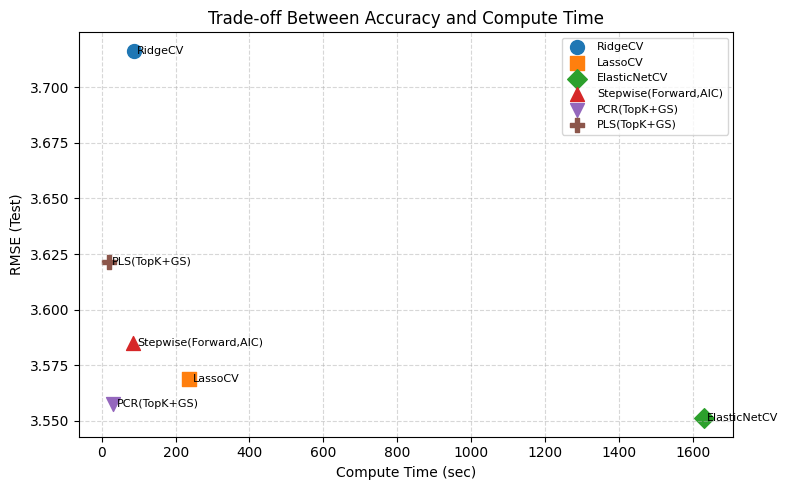

In [195]:
methods = [r["Method"] for r in results]
rmse_test = [r["RMSE(Test)"] for r in results]
time_test = [r["Time(Test)"] for r in results]


markers = ['o', 's', 'D', '^', 'v', 'P', '*']

plt.figure(figsize=(8, 5))


for i, (m, x, y) in enumerate(zip(methods, time_test, rmse_test)):
    plt.scatter(x, y, marker=markers[i % len(markers)], s=100, label=m)
    plt.text(x + 10, y, m, fontsize=8, ha='left', va='center')

plt.xlabel("Compute Time (sec)")
plt.ylabel("RMSE (Test)")
plt.title("Trade-off Between Accuracy and Compute Time")
plt.legend(fontsize=8, loc="best")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()